In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


# loại bỏ cảnh báo
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Network_Ads.csv")

In [3]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000.0,0
1,Male,35,20000.0,0
2,Female,26,43000.0,0
3,Female,27,57000.0,0
4,Male,19,76000.0,0


In [4]:
data.isnull().sum()

Gender              0
Age                 0
EstimatedSalary    11
Purchased           0
dtype: int64

- Cột bị mất dữ liệu là EstimatedSalary

- Sử lý missing data bằng SimpleImputer

In [5]:
imp = SimpleImputer(missing_values = np.nan,strategy = 'mean')

In [6]:
data.iloc[:,2:3] = imp.fit(data.iloc[:,2:3]).transform(data.iloc[:,2:3])

In [7]:
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
data['Gender'] = data['Gender'].map({'Male' : 1,'Female' : 0})

In [9]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000.0,0
1,1,35,20000.0,0
2,0,26,43000.0,0
3,0,27,57000.0,0
4,1,19,76000.0,0


- Vẽ biểu đồ tìm hiểu mối quan hệ

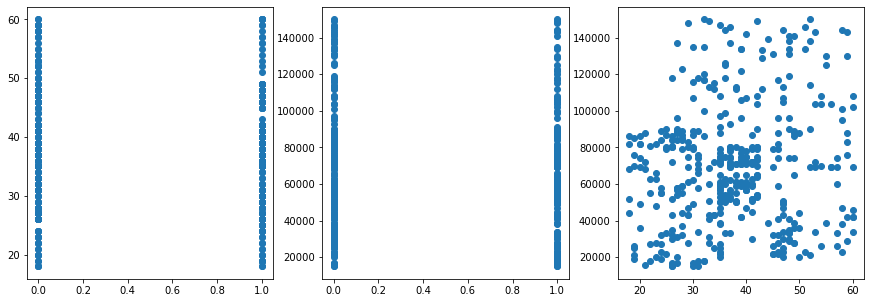

In [10]:
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
ax[0].scatter(data['Gender'],data['Age'])
ax[1].scatter(data['Gender'],data['EstimatedSalary'])
ax[2].scatter(data['Age'],data['EstimatedSalary']);

- Từ biểu đồ trên ta thấy được có thể trọn hai cột đó là 'Age' và 'EstimatedSalary' để làm dự đoán cho cột 'Purchased'

In [11]:
X = data[['Age','EstimatedSalary']].values

In [12]:
X[:10]

array([[1.9e+01, 1.9e+04],
       [3.5e+01, 2.0e+04],
       [2.6e+01, 4.3e+04],
       [2.7e+01, 5.7e+04],
       [1.9e+01, 7.6e+04],
       [2.7e+01, 5.8e+04],
       [2.7e+01, 8.4e+04],
       [3.2e+01, 1.5e+05],
       [2.5e+01, 3.3e+04],
       [3.5e+01, 6.5e+04]])

In [13]:
Y = data[['Purchased']].values

- Feature Scalling

In [14]:
X = MinMaxScaler(feature_range = (0,1)).fit(X).transform(X)

In [15]:
X[:10]

array([[0.02380952, 0.02962963],
       [0.4047619 , 0.03703704],
       [0.19047619, 0.20740741],
       [0.21428571, 0.31111111],
       [0.02380952, 0.45185185],
       [0.21428571, 0.31851852],
       [0.21428571, 0.51111111],
       [0.33333333, 1.        ],
       [0.16666667, 0.13333333],
       [0.4047619 , 0.37037037]])

- Chia tập dữ liệu

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25,random_state = 4)

- Chọn K

In [17]:
hisScore = []
for K in range(1,31):
    KNN = KNeighborsClassifier(n_neighbors = K).fit(x_train,y_train)
    yhat = KNN.predict(x_test)
    hisScore.append(metrics.accuracy_score(y_test,yhat))

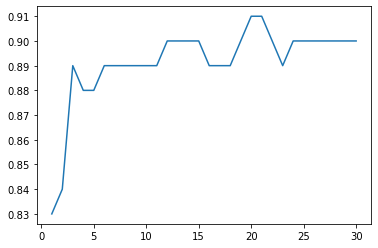

In [18]:
plt.plot([i for i in range(1,31)],hisScore);

- Chọn K = 21

In [26]:
K = 21
KNN = KNeighborsClassifier(n_neighbors = K).fit(x_train,y_train)

yHat = KNN.predict(x_test)

In [27]:
score = metrics.accuracy_score(y_test,yHat)

In [28]:
score

0.91

In [29]:
print(metrics.classification_report(y_test,yHat))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        70
           1       0.84      0.87      0.85        30

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.89       100
weighted avg       0.91      0.91      0.91       100



In [30]:
print(metrics.confusion_matrix(y_test,yHat))

[[65  5]
 [ 4 26]]
